<a href="https://colab.research.google.com/github/retico/cmepda_medphys/blob/master/Lecture8_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration and analysis in Pandas

We'll have a quick look at [pandas](https://pandas.pydata.org/), one of the most used python data analysis libraries, and at [seaborn](https://seaborn.pydata.org/), a high level API to matplotlib for statistical data visualization. Both the libraries are already installed on Colab. 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset


A DataFrames is basically a container for and exposes lots of methods to process tabular data. Data series are stored, instead, in pandas Series.

Pandas offers plenty of readers out of the box.

In [141]:
[x for x in dir(pd) if 'read' in x ]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_feather',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_msgpack',
 'read_parquet',
 'read_pickle',
 'read_sas',
 'read_spss',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table']

Let's read a csv file as a Pandas dataframe. 


In [0]:
dataset_url = "https://raw.githubusercontent.com/retico/cmepda_medphys/master/L8_code/FS_features_ABIDE_males_someGlobals.csv"

In [143]:
df = pd.read_csv(dataset_url)
df.head()

,FILE_ID,AGE_AT_SCAN,SEX,FIQ,DX_GROUP,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol
0,Caltech_0051456,55.4,1,126.0,1,2.52039,2.52379,258703.4443,262670.1207,262254.9768,265741.1295,701211.5651
1,Caltech_0051457,22.9,1,107.0,1,2.55533,2.56998,321132.1284,317004.7945,304528.2513,301555.0187,841485.9229
2,Caltech_0051458,39.2,1,93.0,1,2.64518,2.63160,266418.9917,266456.1701,271683.1723,266494.7088,726728.1619
3,Caltech_0051459,22.8,1,106.0,1,2.70814,2.72762,307157.4469,310540.0389,258618.7918,255480.2694,794676.4859
4,Caltech_0051461,37.7,1,99.0,1,2.59002,2.61012,263932.5269,269417.2519,242330.5838,232809.9268,714122.7788


In [144]:
print(type(df), type(df.FILE_ID))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [145]:
df.columns

Index(['FILE_ID', 'AGE_AT_SCAN', 'SEX', 'FIQ', 'DX_GROUP', 'lh_MeanThickness',
       'rh_MeanThickness', 'lhCortexVol', 'rhCortexVol',
       'lhCerebralWhiteMatterVol', 'rhCerebralWhiteMatterVol', 'TotalGrayVol'],
      dtype='object')

Since it is hard to remember what DX_GROUP=1 actually means, let's make this column more readable.

Firt, we select the DX_GROUP column, then we apply a function to all its elements.

In [146]:
df['DX_GROUP'] = df.DX_GROUP.apply(lambda x: 'Controls' if x==-1 else 'ASD')
df.head()

,FILE_ID,AGE_AT_SCAN,SEX,FIQ,DX_GROUP,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol
0,Caltech_0051456,55.4,1,126.0,ASD,2.52039,2.52379,258703.4443,262670.1207,262254.9768,265741.1295,701211.5651
1,Caltech_0051457,22.9,1,107.0,ASD,2.55533,2.56998,321132.1284,317004.7945,304528.2513,301555.0187,841485.9229
2,Caltech_0051458,39.2,1,93.0,ASD,2.64518,2.63160,266418.9917,266456.1701,271683.1723,266494.7088,726728.1619
3,Caltech_0051459,22.8,1,106.0,ASD,2.70814,2.72762,307157.4469,310540.0389,258618.7918,255480.2694,794676.4859
4,Caltech_0051461,37.7,1,99.0,ASD,2.59002,2.61012,263932.5269,269417.2519,242330.5838,232809.9268,714122.7788


In [147]:
df.DX_GROUP.unique()

array(['ASD', 'Controls'], dtype=object)

# Boxplots

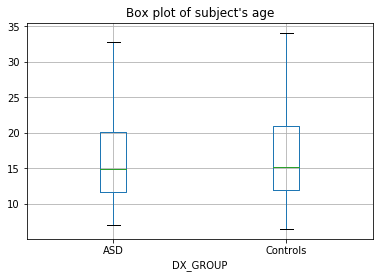

In [148]:
boxplot = df.boxplot(column=['AGE_AT_SCAN'], by='DX_GROUP', showfliers=False)
boxplot.set_title('Box plot of subject\'s age')
boxplot.get_figure().suptitle('');

The provenance site is part of the FILE_ID, we can extract and add it to a new column

In [0]:
df['ProvenanceSite'] = df.FILE_ID.apply(lambda x: x.split('_')[0])

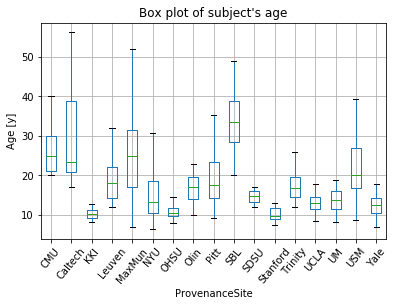

In [150]:
boxplot = df.boxplot(column=['AGE_AT_SCAN'], by='ProvenanceSite', showfliers=False)
boxplot.set_title('Box plot of subject\'s age')
boxplot.get_figure().suptitle('');
boxplot.set_ylabel('Age [y]')

boxplot.set_xticklabels(labels=boxplot.get_xticklabels(), rotation=50);

Seaborn interoperates well with pandas DataFrame and allows us to refer to columns by label

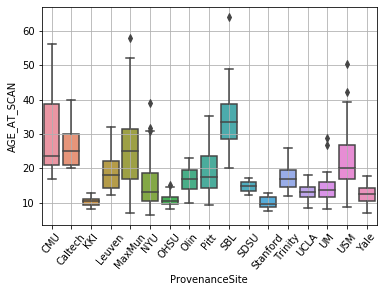

In [151]:
sns_boxplot = sns.boxplot(x='ProvenanceSite', y='AGE_AT_SCAN', data=df)
sns_boxplot.set_xticklabels(labels=boxplot.get_xticklabels(), rotation=50);
sns_boxplot.grid()

# Grouping

Data can be grouped by feature and summarized according to a given accumulation function

In [152]:
df.groupby(by='AGE_AT_SCAN')

In [153]:
df.groupby(by='AGE_AT_SCAN')['FILE_ID']

In [154]:
provenance_counts = df.groupby('ProvenanceSite')['FILE_ID'].count()
provenance_counts

ProvenanceSite
CMU          21
Caltech      30
KKI          42
Leuven       55
MaxMun       47
NYU         147
OHSU         28
Olin         31
Pitt         48
SBL          30
SDSU         28
Stanford     30
Trinity      49
UCLA         85
UM          103
USM         101
Yale         40
Name: FILE_ID, dtype: int64

It is quite easy to obtain a bar plot from a pandas Series

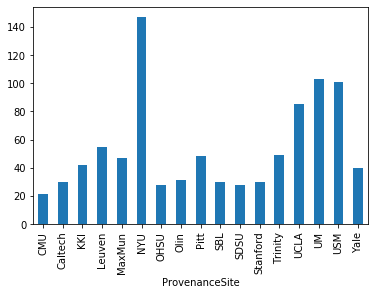

In [155]:
provenance_counts.plot(kind='bar')

Now lets try to create a stacked bar plot showing the DX_GROUP

In [156]:
stack = df.groupby(['ProvenanceSite', 'DX_GROUP'])['FILE_ID'].count()
stack

ProvenanceSite  DX_GROUP
CMU             ASD         11
                Controls    10
Caltech         ASD         15
                Controls    15
KKI             ASD         18
                Controls    24
Leuven          ASD         26
                Controls    29
MaxMun          ASD         19
                Controls    28
NYU             ASD         68
                Controls    79
OHSU            ASD         13
                Controls    15
Olin            ASD         17
                Controls    14
Pitt            ASD         26
                Controls    22
SBL             ASD         15
                Controls    15
SDSU            ASD         13
                Controls    15
Stanford        ASD         15
                Controls    15
Trinity         ASD         24
                Controls    25
UCLA            ASD         46
                Controls    39
UM              ASD         47
                Controls    56
USM             ASD         58
              

In [157]:
unstacked = stack.unstack('DX_GROUP')
unstacked

DX_GROUP,ASD,Controls
ProvenanceSite,,
CMU,11,10
Caltech,15,15
KKI,18,24
Leuven,26,29
MaxMun,19,28
NYU,68,79
OHSU,13,15
Olin,17,14
Pitt,26,22


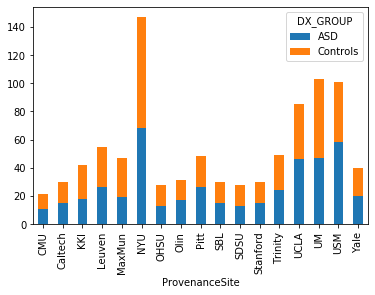

In [158]:
unstacked.plot(kind='bar', stacked=True)

# Slicing

To select ranges of rows and/or columns it is possible to use labels or indices.

In [159]:
df.columns

Index(['FILE_ID', 'AGE_AT_SCAN', 'SEX', 'FIQ', 'DX_GROUP', 'lh_MeanThickness',
       'rh_MeanThickness', 'lhCortexVol', 'rhCortexVol',
       'lhCerebralWhiteMatterVol', 'rhCerebralWhiteMatterVol', 'TotalGrayVol',
       'ProvenanceSite'],
      dtype='object')

In [160]:
selected_feat = df.loc[:,'lh_MeanThickness':'rhCortexVol']
selected_feat.head()

,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol
0,2.52039,2.52379,258703.4443,262670.1207
1,2.55533,2.56998,321132.1284,317004.7945
2,2.64518,2.63160,266418.9917,266456.1701
3,2.70814,2.72762,307157.4469,310540.0389
4,2.59002,2.61012,263932.5269,269417.2519


In [161]:
df.iloc[:,5:9].head()

,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol
0,2.52039,2.52379,258703.4443,262670.1207
1,2.55533,2.56998,321132.1284,317004.7945
2,2.64518,2.63160,266418.9917,266456.1701
3,2.70814,2.72762,307157.4469,310540.0389
4,2.59002,2.61012,263932.5269,269417.2519


Let's see how our selection looks like!

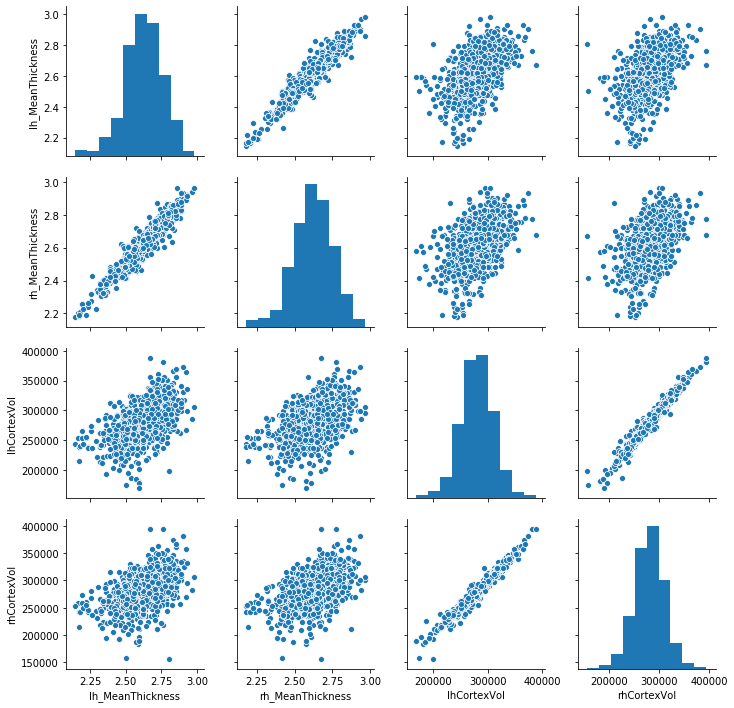

In [162]:
sns.pairplot(df.iloc[:,5:9])

# Finding the outliers

In [0]:
import scipy.stats

In [164]:
data = df.iloc[:,5:11]
data.head()

,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol
0,2.52039,2.52379,258703.4443,262670.1207,262254.9768,265741.1295
1,2.55533,2.56998,321132.1284,317004.7945,304528.2513,301555.0187
2,2.64518,2.63160,266418.9917,266456.1701,271683.1723,266494.7088
3,2.70814,2.72762,307157.4469,310540.0389,258618.7918,255480.2694
4,2.59002,2.61012,263932.5269,269417.2519,242330.5838,232809.9268


We consider the z-score as a factor to determine the presence of outliers.
Z-score is defined as:

$z(x) = \frac{x - \bar{x}}{\sigma}$. 

Data with a z-score above 3 (beyond 3$\sigma$) are outliers.

In [165]:
data[(abs(scipy.stats.zscore(data)) < 3).all(axis=1)]

,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol
0,2.52039,2.52379,258703.4443,262670.1207,262254.9768,265741.1295
1,2.55533,2.56998,321132.1284,317004.7945,304528.2513,301555.0187
2,2.64518,2.63160,266418.9917,266456.1701,271683.1723,266494.7088
3,2.70814,2.72762,307157.4469,310540.0389,258618.7918,255480.2694
4,2.59002,2.61012,263932.5269,269417.2519,242330.5838,232809.9268
...,...,...,...,...,...,...
910,2.36238,2.38152,192826.5499,195519.7899,181671.5502,178748.1592
911,2.50005,2.52849,252293.1567,257263.1314,210779.7950,210714.3714
912,2.70636,2.72184,264309.1936,268447.9865,186742.5963,189804.7237
913,2.52114,2.54823,296770.5313,309780.9732,255228.1165,260365.0738


## TTest

Is there any significant difference in the AGE_AT_SCAN and FIQ features between the two diagnostic categories?

In [0]:
df_ASD = df[df.DX_GROUP == 'ASD']
df_CTR = df[df.DX_GROUP == 'Controls']

In [167]:
ttest_res = scipy.stats.ttest_ind(df_ASD.AGE_AT_SCAN, df_CTR.AGE_AT_SCAN)
ttest_res

Ttest_indResult(statistic=-0.17065782953105668, pvalue=0.8645306344621716)

In [168]:
ttest_res = scipy.stats.ttest_ind(df_ASD.FIQ, df_CTR.FIQ)
ttest_res

Ttest_indResult(statistic=-0.12404932406284155, pvalue=0.9013035261691134)

Let's try with a new index of left-right asimmetry in mean thickness

In [0]:
def LR(data):
  LR = data.lh_MeanThickness-data.rh_MeanThickness
  LR /= 0.5*(data.rh_MeanThickness+data.lh_MeanThickness)
  data['LR'] = LR
  return data

In [170]:
data = LR(df)
data.head()

,FILE_ID,AGE_AT_SCAN,SEX,FIQ,DX_GROUP,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol,ProvenanceSite,LR
0,Caltech_0051456,55.4,1,126.0,ASD,2.52039,2.52379,258703.4443,262670.1207,262254.9768,265741.1295,701211.5651,Caltech,-0.001348
1,Caltech_0051457,22.9,1,107.0,ASD,2.55533,2.56998,321132.1284,317004.7945,304528.2513,301555.0187,841485.9229,Caltech,-0.005717
2,Caltech_0051458,39.2,1,93.0,ASD,2.64518,2.63160,266418.9917,266456.1701,271683.1723,266494.7088,726728.1619,Caltech,0.005147
3,Caltech_0051459,22.8,1,106.0,ASD,2.70814,2.72762,307157.4469,310540.0389,258618.7918,255480.2694,794676.4859,Caltech,-0.007167
4,Caltech_0051461,37.7,1,99.0,ASD,2.59002,2.61012,263932.5269,269417.2519,242330.5838,232809.9268,714122.7788,Caltech,-0.007731


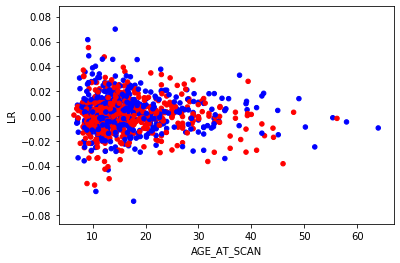

In [171]:
color = data.DX_GROUP.apply(lambda x:'blue' if x == 'ASD' else 'red')
ax = data.plot(x='AGE_AT_SCAN', y='LR', kind='scatter', color=color);
#ax.grid()

In [172]:
data.DX_GROUP.unique()

array(['ASD', 'Controls'], dtype=object)

In [0]:
LR_ASD = data[data['DX_GROUP'] == 'ASD']['LR']
LR_CTR = data[data['DX_GROUP'] == 'Controls']['LR']

In [174]:
scipy.stats.ttest_ind(LR_ASD, LR_CTR)

Ttest_indResult(statistic=3.3372407440248693, pvalue=0.0008803236500893867)

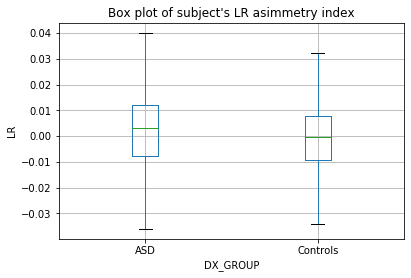

In [175]:
boxplot = df.boxplot(column=['LR'], by='DX_GROUP', showfliers=False)
boxplot.set_title('Box plot of subject\'s LR asimmetry index')
boxplot.get_figure().suptitle('');
boxplot.set_ylabel('LR')

boxplot.set_xticklabels(labels=boxplot.get_xticklabels());

We can compute the effect size in terms od Cohen's d index

In [176]:
d_cohen = (LR_ASD.mean()-LR_CTR.mean())/data['LR'].std()
d_cohen

0.2194601644424404

# Find the correlation

In [177]:
data.drop('SEX', axis=1).corr()

,AGE_AT_SCAN,FIQ,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol,LR
AGE_AT_SCAN,1.000000,-0.302034,-0.582304,-0.586038,-0.262530,-0.250016,0.438887,0.430706,-0.212807,-0.039969
FIQ,-0.302034,1.000000,0.365001,0.348166,0.062747,0.049527,-0.227115,-0.210528,0.037634,0.096843
lh_MeanThickness,-0.582304,0.365001,1.000000,0.955238,0.529479,0.493574,-0.278798,-0.281760,0.467387,0.232968
rh_MeanThickness,-0.586038,0.348166,0.955238,1.000000,0.509903,0.508397,-0.288463,-0.287313,0.464578,-0.064748
lhCortexVol,-0.262530,0.062747,0.529479,0.509903,1.000000,0.981343,0.470413,0.466139,0.974726,0.107532
rhCortexVol,-0.250016,0.049527,0.493574,0.508397,0.981343,1.000000,0.470385,0.481971,0.974743,-0.007945
lhCerebralWhiteMatterVol,0.438887,-0.227115,-0.278798,-0.288463,0.470413,0.470385,1.000000,0.992170,0.524847,0.005129
rhCerebralWhiteMatterVol,0.430706,-0.210528,-0.281760,-0.287313,0.466139,0.481971,0.992170,1.000000,0.527529,-0.007727
TotalGrayVol,-0.212807,0.037634,0.467387,0.464578,0.974726,0.974743,0.524847,0.527529,1.000000,0.047787
LR,-0.039969,0.096843,0.232968,-0.064748,0.107532,-0.007945,0.005129,-0.007727,0.047787,1.000000


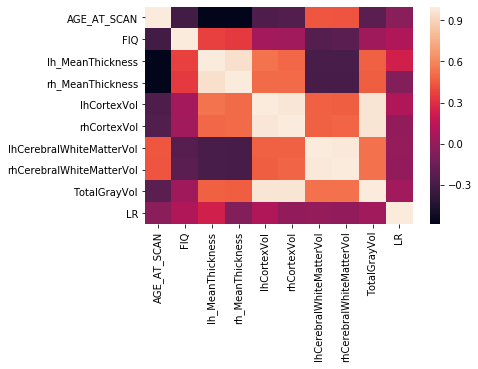

In [178]:
sns.heatmap(data.drop('SEX', axis=1).corr());

In [179]:
res = scipy.stats.pearsonr(data['rhCortexVol'], data['LR'])
res

(-0.007944648727167424, 0.8103359197685401)

# Regression model

In [0]:
import sklearn
from sklearn.linear_model import LinearRegression

In [0]:
lin_reg = LinearRegression()

In [182]:
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
X_feat = pd.DataFrame(data=data, columns=['lh_MeanThickness', 'rh_MeanThickness'])
Y_ = data.AGE_AT_SCAN

In [0]:
model = lin_reg.fit(X_feat, Y_)

In [185]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [186]:
[x for x  in dir(model) if not x.startswith('_')]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [187]:
model.score(X_feat, Y_)

0.34922411882894755